<a href="https://colab.research.google.com/github/igordantasgf/analise_dados_microambientais/blob/main/estudos2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime
import numpy as np
import seaborn
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_path = '/content/drive/MyDrive/Bolsa - Edson/estudos/Pasta sem nome/labmim_completo_2016_2022.dat'
frame = pd.read_csv(data_path, sep=';')
tempo = list(zip(frame['year'],frame['month'],frame['day'],frame['hour']))
print(frame.columns)

In [4]:
# Formatação de datas
datas=[]
for i in tempo:
  i = list(i)
  datas.append(datetime.datetime(i[0],i[1],i[2],i[3]))
frame['datas'] = datas
frame['year/month/day'] = list(zip(frame['datas'].dt.year, frame['datas'].dt.month, frame['datas'].dt.day))

## **Controle de dados**: filtragem de dias
* O parâmetro a ser analisado deve ser definido abaixo, nem "variavel"
* "horas_minimo" define a quantidade mínima de horas analisadas para que um dia seja considerado como conjunto de dados válido


In [5]:
variavel = 'Sw_dw'
horas_minimo = 8

### Análise de Sw_dw: corta dias com menos de 8 horas com dados
if variavel=='Sw_dw':
  df = pd.DataFrame(frame, columns=['year/month/day',variavel])
  df['meses'] = frame['datas'].dt.month
  tabela = df.groupby('year/month/day')
  analise=[]
  analise_new=[]
  for i in tabela:
    analise.append(i)

  for item in analise: # criando lista com dias com quantidade de dados suficiente
    contador=0
    for k in item[1][variavel]:
      if math.isnan(k)==True:
        contador=contador+1
    if contador>=horas_minimo:
      analise_new.append(item)


* Criação de lista com dados separados em meses (médias diárias)

In [72]:
dados_meses = []
for a in range(12):
  dados_meses.append([])

for i in analise_new:
  k = int(i[0][1])-1
  dados_meses[k].append(i[1].groupby('year/month/day').mean()['Sw_dw'][0])

In [ ]:
dados_meses

* Plotting

Text(0.5, 1.0, 'Médias diária de Sw_dw')

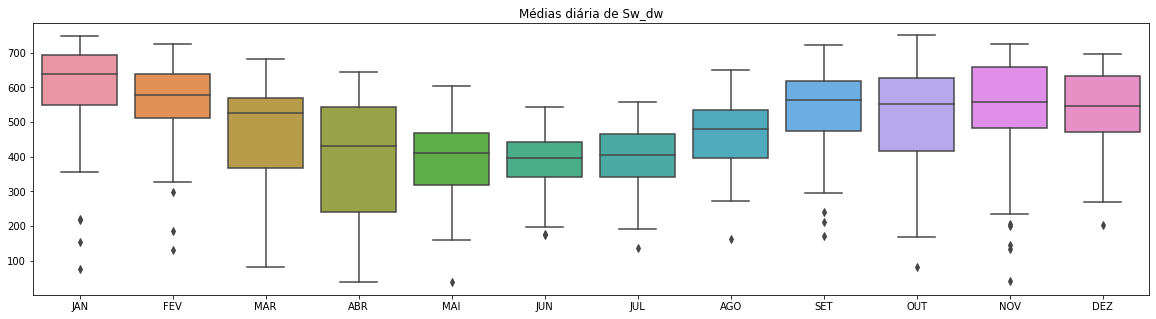

In [78]:
m_label = ['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']
fig, ax = plt.subplots(figsize=(20,5))
g = seaborn.boxplot(data=dados_meses, orient='v')
g.set_xticklabels(m_label)
g.set_title("Médias diária de {}".format(variavel))